# Clustering par voisinage local

Voir Exercice 3 - ML Examen 2015

**Ben Kabongo**, M1 DAC, Sorbonne Université

In [1]:
import numpy as np
import matplotlib.pyplot as plt

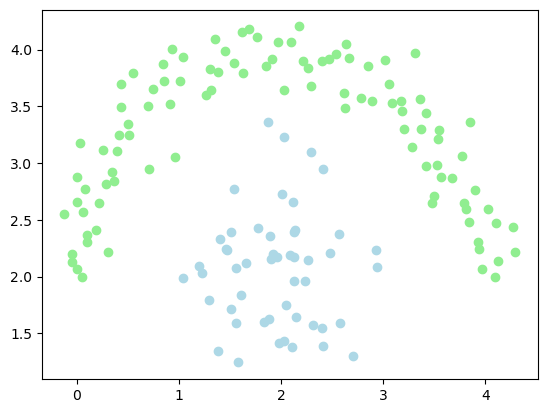

In [2]:
np.random.seed(42)
theta = np.linspace(0, np.pi, 100)
r = np.random.normal(loc=2, scale=0.2, size=100)
x1 = r * np.cos(theta) + 2
y1 = r * np.sin(theta) + 2
X1 = np.column_stack((x1, y1))

X2 = np.random.normal(loc=(2,2), scale=0.5, size=(50, 2))

X = np.concatenate((X1, X2), axis=0)

plt.scatter(X1[:,0], X1[:,1], c='lightgreen')
plt.scatter(X2[:,0], X2[:,1], c='lightblue')
plt.show()


In [3]:
np.argsort([2, 5, 1])

array([2, 0, 1])

In [4]:
def ppv(X, p):
    N = len(X)
    V = np.zeros((N, p), dtype=int)
    graph = np.full((N, N), np.inf)
    for i in range(N):
        d = ((X - X[i]) ** 2).sum(axis=1)
        arg = np.argsort(d)
        arg = np.delete(arg, np.where(arg == i))[:p]
        graph[i][arg] = d[arg]
        V[i] = arg
    return V, graph

In [5]:
V, graph = ppv(X, 5)

In [6]:
V[0]

array([2, 1, 3, 4, 5])

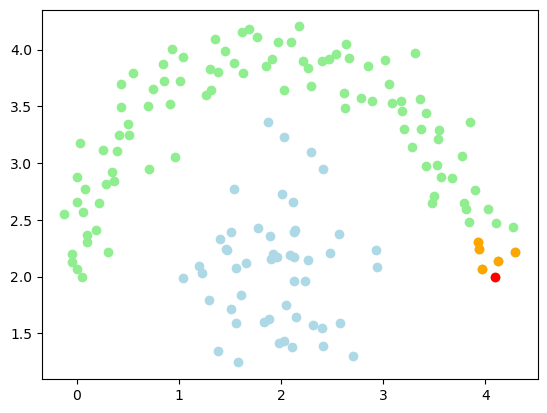

In [7]:
plt.scatter(X1[:,0], X1[:,1], c='lightgreen')
plt.scatter(X2[:,0], X2[:,1], c='lightblue')

plt.scatter(X[:, 0][0], X[:, 1][0], c='red')
plt.scatter(X[:, 0][V[0]], X[:, 1][V[0]], c='orange')

plt.show()


In [8]:
def dist_vois(graph):
    N = len(graph)
    graph_level = np.full((N, N, N), np.inf)
    graph_level[0] = graph
    for l in range(1, N):
        for i in range(N):
            for j in range(N):
                if i == j: continue
                graph_level[l, i, j] = np.min([graph[i, k] + graph_level[l - 1, k, j] if k not in (i, j) else np.inf for k in range(N)])
    return graph_level.min(axis=0)


In [9]:
graph_fin = dist_vois(graph)

In [10]:
graph_fin[0].argsort()

array([  2,   1,   3,   4,   5,   8,   6,  10,  11,   7,   9,  12,  15,
        16,  18,  19,  14,  17,  13,  21,  22,  23,  24,  26,  25,  27,
        28,  20,  29,  30,  32,  33,  35,  34,  38,  37,  36,  39,  40,
        41,  42,  31,  43,  45,  44,  46,  48,  50,  47,  49,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  66,  68,
        70,  67,  69,  64,  72,  65,  71,  73,  76,  75,  77,  78,  80,
        81,  83,  84,  85,  82,  88,  87,  86,  89,  90,  91,  92,  93,
        94,  96,  95,  97,  98,  99, 131, 132, 134, 133, 130, 125, 128,
       135, 127, 126, 129, 136,   0, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 124, 137, 123,  74, 121, 148,  79, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 122, 149])

In [11]:
def kMeans(k, graph_fin, max_iter=100):
    N = len(graph_fin)

    # centroide aléatoires
    W = np.random.choice(np.arange(N), k)
    partitions = {}

    for _ in range(max_iter):

        # clustering
        partitions = {}
        for i in range(N):
            j = np.argmin([graph_fin[i, w] for w in W])
            if j not in partitions:
                partitions[j] = []
            partitions[j] = partitions[j] + [i]

        # meilleur centroide par cluster
        for j in range(k):
            if j in partitions:
                idx = partitions[j]
                min_i_dist = np.inf
                i = -1
                for i1 in idx:
                    i_dist = 0
                    for i2 in idx:
                        if i1 == i2: continue
                        i_dist += graph_fin[i1, i2]
                    if i_dist < min_i_dist:
                        min_i_dist = i_dist
                        i = i1
                if i != -1:
                    W[j] = i

    return W, partitions


In [12]:
W, partitions = kMeans(2, graph_fin, max_iter=100)

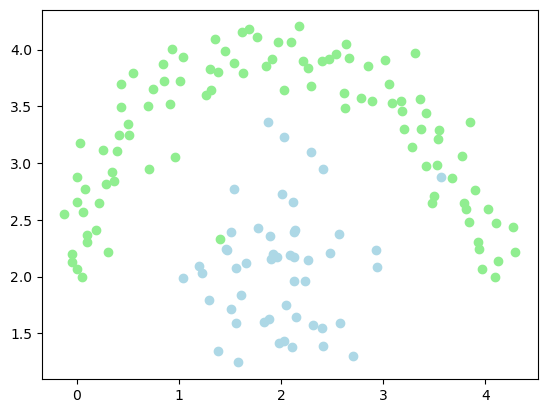

In [13]:
# vérification du partitionnement
plt.scatter(X[:, 0][partitions[0]], X[:, 1][partitions[0]], c='lightblue')
plt.scatter(X[:, 0][partitions[1]], X[:, 1][partitions[1]], c='lightgreen')

plt.show()